<a href="https://colab.research.google.com/github/2300039018/Elevate-labs-task-1-Calculator-CLI/blob/main/Elevate_labs_task5_sales_data_csvfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Home & Garden'], 100),
    'Quantity': np.random.randint(1, 10, 100),
    'Unit_Price': np.random.uniform(10, 200, 100),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 100)
}
df = pd.DataFrame(data)
df['Revenue'] = df['Quantity'] * df['Unit_Price']
df.to_csv('sample_sales_data.csv', index=False)
print("Sample data shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Sample data shape: (100, 6)

First 5 rows:
        Date Product_Category  Quantity  Unit_Price Region     Revenue
0 2024-01-01            Books         2  199.570692  North  399.141384
1 2024-01-02    Home & Garden         2   60.688393   West  121.376785
2 2024-01-03      Electronics         4  195.556842  North  782.227366
3 2024-01-04            Books         8   88.097033  North  704.776260
4 2024-01-05            Books         7   16.279639  South  113.957475


In [2]:

df_loaded = pd.read_csv('sample_sales_data.csv')
df_loaded['Date'] = pd.to_datetime(df_loaded['Date'])

print("Loaded data shape:", df_loaded.shape)
print("\nData info:")
print(df_loaded.info())

Loaded data shape: (100, 6)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              100 non-null    datetime64[ns]
 1   Product_Category  100 non-null    object        
 2   Quantity          100 non-null    int64         
 3   Unit_Price        100 non-null    float64       
 4   Region            100 non-null    object        
 5   Revenue           100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.8+ KB
None


In [3]:


category_sales = df_loaded.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
print("Total Revenue by Product Category:")
print(category_sales)


region_sales = df_loaded.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Region:")
print(region_sales)

print("\nOverall Revenue Summary:")
print(df_loaded['Revenue'].describe())

Total Revenue by Product Category:
Product_Category
Home & Garden    20040.114272
Electronics      15927.801434
Clothing         14143.628162
Books            10777.043947
Name: Revenue, dtype: float64

Total Revenue by Region:
Region
East     18396.405775
South    16330.555425
West     15506.789375
North    10654.837241
Name: Revenue, dtype: float64

Overall Revenue Summary:
count     100.000000
mean      608.885878
std       431.537186
min        43.976315
25%       216.508279
50%       564.755827
75%       925.011433
max      1763.906788
Name: Revenue, dtype: float64


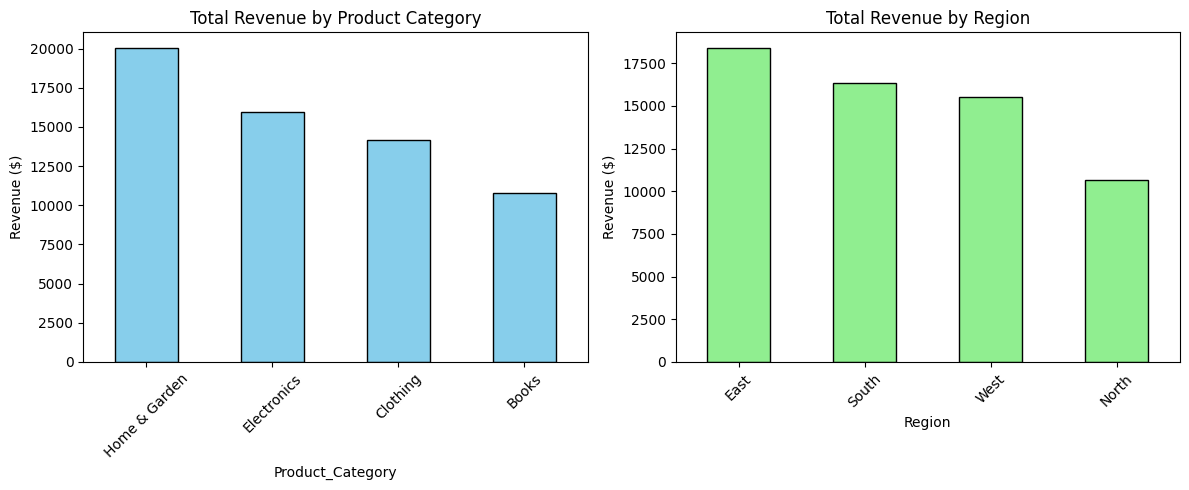

/tmp/ipython-input-464740177.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_loaded.resample('M', on='Date')['Revenue'].sum()


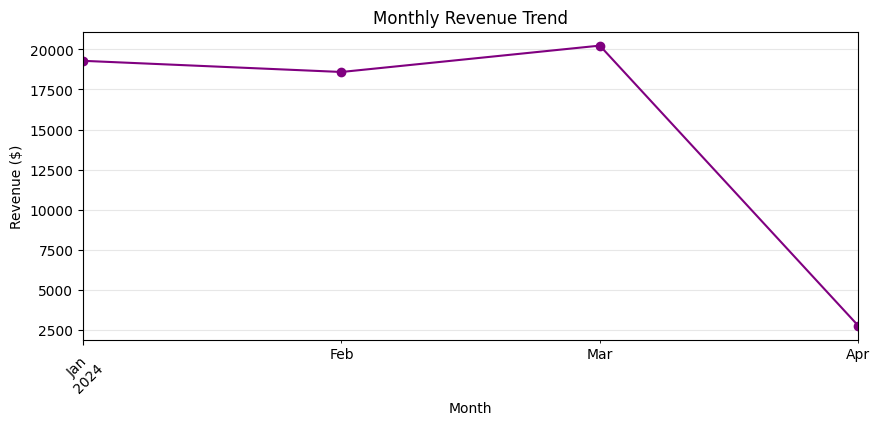

In [4]:

plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
category_sales.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Total Revenue by Product Category')
axes[0].set_ylabel('Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)
region_sales.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Total Revenue by Region')
axes[1].set_ylabel('Revenue ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
monthly_revenue = df_loaded.resample('M', on='Date')['Revenue'].sum()
monthly_revenue.plot(kind='line', color='purple', marker='o', figsize=(10, 4))
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()